# Indeed Reviews Analysis

### Data Cleaning and Exploaratory data analysis

#### Importing the libraries for data cleaning and Visualization

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

###### Reading the csv file with ratings and analyzing the missing values, shape of the data set

In [13]:
reviews=pd.read_csv("C:/Users/monic/Google Drive/Fall-18/660/reviews_industry.csv")

In [14]:
reviews.head(5)

,Unnamed: 0,author,company,cons,date,employee_type,location,pros,text,title,user_rating,Year,Month,Date,weekday,state,city,Sector
0,0,Code Compliance Financial Analyst,United Technologies,NaN,"June 29, 2015",Current,"['New York', ' NY']",NaN,"Company is alright to work for, for what i wan...",Job Advancement,4.0,2015,6,29,Monday,NY,New York,Aerospace & Defense
1,1,Research Engineer,United Technologies,NaN,"October 23, 2018",Former,"['East Hartford', ' CT']",NaN,United Technologies Corporation is a great pla...,Great place to work,5.0,2018,10,23,Tuesday,CT,East Hartford,Aerospace & Defense
2,2,Senior Team Leader III,United Technologies,NaN,"October 22, 2018",Current,"['Riverside', ' CA']",NaN,UTC is very good place to work. The corporat...,UTC is a good place to work.,4.0,2018,10,22,Monday,CA,Riverside,Aerospace & Defense
3,3,Dispatch Supervisor,United Technologies,missed a service call,"October 22, 2018",Former,"['New York', ' NY']",2 / 15 minutes breaks,Typical work day 8 to 4:30 working with field ...,"Dispatch Supervisor for a ""strict an all work""...",5.0,2018,10,22,Monday,NY,New York,Aerospace & Defense
4,4,Senior Analyst/Project Manager,United Technologies,NaN,"October 19, 2018",Former,"['Colorado Springs', ' CO']",NaN,Org seems to concentrate on the wrong issues w...,Uncomfortable,2.0,2018,10,19,Friday,CO,Colorado Springs,Aerospace & Defense


In [12]:
reviews.shape

(915592, 10)

In [5]:
  reviews.isnull().sum(axis = 0)

author           140514
company               0
cons             606370
date             139966
employee_type    139966
location         139967
pros             584739
text             139966
title            141954
user_rating      139966
dtype: int64

It is obsereved that the data has missing records in all the columns hence removing these columns.

In [11]:
reviews=reviews.loc[reviews['title'].notnull(),:]

In [7]:
reviews.isnull().sum(axis = 0)

author              543
company               0
cons             464665
date                  0
employee_type         0
location              1
pros             443019
text                  0
title                 0
user_rating           0
dtype: int64

Transforming the date column by splitting it into Year, Month, Date and Weekday to understanding the rating distribution.

In [8]:
#######tranforming the date column. Splitting it into day, Year, month and weekday
reviews['Year'] = (pd.DatetimeIndex(reviews['date']).year).astype("int64")
reviews['Month'] = (pd.DatetimeIndex(reviews['date']).month)
reviews['Date'] = (pd.DatetimeIndex(reviews['date']).day).astype("int64")
reviews['datetime'] = reviews['date'].apply(lambda x: pd.to_datetime(x))
reviews['weekday'] = pd.to_datetime(reviews['datetime']).dt.weekday_name
reviews = reviews.drop(['datetime'], axis = 1)

In [9]:
reviews['location']=reviews['location'].fillna("No location")
#reviews.head(5)

The location column is split into city and state. It is obsereved that a few records have the complete address while a few do not have city and state information.

In [10]:
######Using the location to get the state and city
reviews['location'] = reviews["location"].apply(lambda x: x.split(","))
#print(reviews.location)
reviews['state'] = reviews['location'].apply(lambda x: " ".join(x[1:]))
#print(reviews['state'])
reviews['city'] = reviews['location'].apply(lambda x: "".join(x[0]))
#print(city)

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915592 entries, 0 to 1057543
Data columns (total 16 columns):
author           915049 non-null object
company          915592 non-null object
cons             450927 non-null object
date             915592 non-null object
employee_type    915592 non-null object
location         915592 non-null object
pros             472573 non-null object
text             915592 non-null object
title            915592 non-null object
user_rating      915592 non-null float64
Year             915592 non-null int64
Month            915592 non-null int64
Date             915592 non-null int64
weekday          915592 non-null object
state            915592 non-null object
city             915592 non-null object
dtypes: float64(1), int64(3), object(12)
memory usage: 118.8+ MB


Extracting the type of employee information ie former or current from employee type data

In [12]:
reviews['employee_type'] = reviews["employee_type"].apply(lambda st: st[st.find("(")+1:st.find(")")-9])

In [13]:
reviews.head(5)

,author,company,cons,date,employee_type,location,pros,text,title,user_rating,Year,Month,Date,weekday,state,city
0,Code Compliance Financial Analyst,United Technologies,NaN,"June 29, 2015",Current,"[New York, NY]",NaN,"Company is alright to work for, for what i wan...",Job Advancement,4.0,2015,6,29,Monday,NY,New York
2,Research Engineer,United Technologies,NaN,"October 23, 2018",Former,"[East Hartford, CT]",NaN,United Technologies Corporation is a great pla...,Great place to work,5.0,2018,10,23,Tuesday,CT,East Hartford
3,Senior Team Leader III,United Technologies,NaN,"October 22, 2018",Current,"[Riverside, CA]",NaN,UTC is very good place to work. The corporat...,UTC is a good place to work.,4.0,2018,10,22,Monday,CA,Riverside
4,Dispatch Supervisor,United Technologies,missed a service call,"October 22, 2018",Former,"[New York, NY]",2 / 15 minutes breaks,Typical work day 8 to 4:30 working with field ...,"Dispatch Supervisor for a ""strict an all work""...",5.0,2018,10,22,Monday,NY,New York
5,Senior Analyst/Project Manager,United Technologies,NaN,"October 19, 2018",Former,"[Colorado Springs, CO]",NaN,Org seems to concentrate on the wrong issues w...,Uncomfortable,2.0,2018,10,19,Friday,CO,Colorado Springs


Loading the fortune 1000 csv file which has sector information to get the sector(Industry) information.

In [14]:
fortune_industry=pd.read_excel("C:/Users/monic/Google Drive/Fall-18/660/Project/fortune1000.xlsx")

In [15]:
fortune_industry.columns

Index(['rank', 'company', 'Previous Rank', 'Revenues ($M)', 'Revenue Change',
       'Profits ($M)', 'Profit Change', 'Assets ($M)',
       'Mkt Value as of 3/29/18 ($M)', 'Employees', 'CEO', 'CEO Title',
       'Sector', 'Industry', 'Years on Fortune 500 List', 'City', 'State',
       'Latitude', 'Longitude'],
      dtype='object')

Joining the reviews data set with the fortune 1000 list to visualize the data

In [16]:
reviews_industry=pd.merge(reviews,fortune_industry[['company','Sector']],on=['company'])

In [17]:
#reviews_industry.to_csv("reviews_industry.csv",encoding='utf-8')

In [18]:
reviews_industry.columns

Index(['author', 'company', 'cons', 'date', 'employee_type', 'location',
       'pros', 'text', 'title', 'user_rating', 'Year', 'Month', 'Date',
       'weekday', 'state', 'city', 'Sector'],
      dtype='object')

In [19]:
reviews_industry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906343 entries, 0 to 906342
Data columns (total 17 columns):
author           905803 non-null object
company          906343 non-null object
cons             446141 non-null object
date             906343 non-null object
employee_type    906343 non-null object
location         906343 non-null object
pros             467530 non-null object
text             906343 non-null object
title            906343 non-null object
user_rating      906343 non-null float64
Year             906343 non-null int64
Month            906343 non-null int64
Date             906343 non-null int64
weekday          906343 non-null object
state            906343 non-null object
city             906343 non-null object
Sector           906343 non-null object
dtypes: float64(1), int64(3), object(13)
memory usage: 124.5+ MB


In [20]:
pd.crosstab(index=reviews_industry['state'],columns='count')

col_0,count
state,
,68077
,3
AL,1
AR,1
Afghanistan,1
Al,1
Amherst Kenmore Niagara Falls NY,1
Antarctica,1
Arkansas,1


##### Plotting Year, Month and employee type to see how the data is spread over the years. It is obsereved that the year 2018  and the month August has the longest bar for current and former employee

The dataset is filtered to consider only the former and current categories in the columns. The other levels did not have meaningful levels hence have dropped them from visulaization

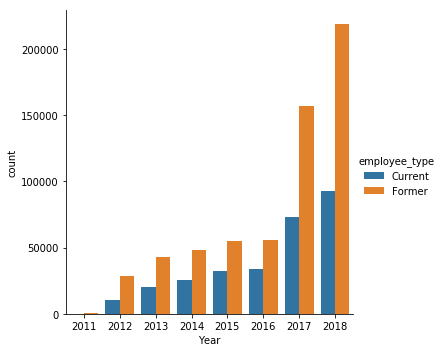

In [21]:
filter_df=reviews_industry[(reviews_industry.employee_type =='Former') | (reviews_industry.employee_type =='Current')]
#pd.crosstab(index=ax['employee_type'],columns='count')
sns.catplot(x='Year',hue='employee_type',data=filter_df,kind='count')

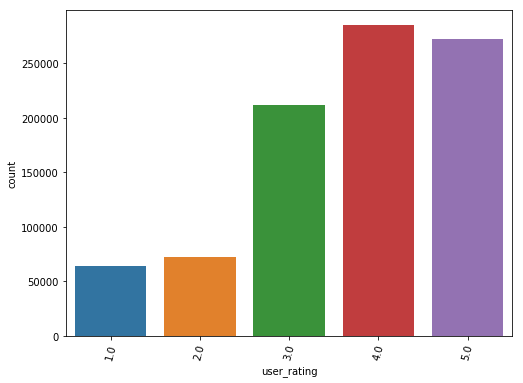

In [22]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
sns.countplot(x='user_rating',data=reviews)

##### Below is the count plot of reviews vs Month, Date and Weekday. 
- It could be seen that the Tuesday and Wednesday have highest reviews. 
- The 15th of a month has more reviews given by employee's.

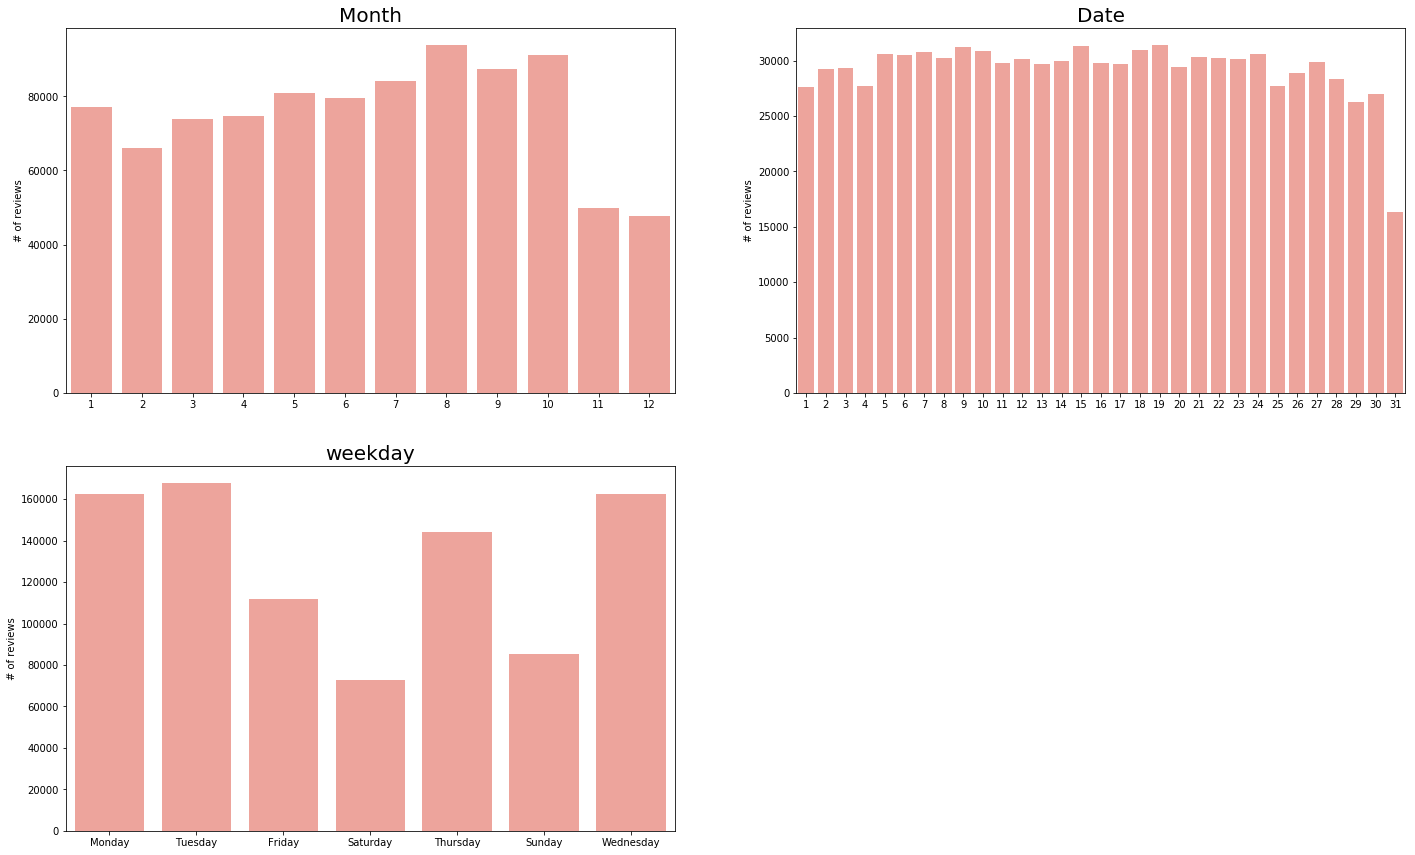

In [23]:
columns = reviews_industry.iloc[:,11:14].columns

grid = gridspec.GridSpec(24, 2)
plt.figure(figsize=(24,24*8))


for n, col in enumerate(reviews_industry[columns]):
    ax = plt.subplot(grid[n])
    ax= sns.countplot(x=reviews_industry[col],alpha=0.8,color='salmon')
    ax.set_ylabel('# of reviews',)
    ax.set_title(str(col), fontsize = 20)
    plt.xlabel('', fontsize=12)
plt.show()

##### The bar plot between user_rating, sector and the employee type shows that the ratings are almost evenly distributed across sectors and the employee type.

##### Count plot of employee type vs year, month, day and weekday (Red color for former employee and blue for current) shows the reviews count.

##### Loading the sentiment file which has positive, negative and neutral sentiment obtained by running text mining

In [26]:
sentiment=pd.read_csv("C:/Users/monic/Google Drive/Fall-18/660/reviews_with_sentiment.csv")

In [27]:
reviews_sentiment=pd.merge(sentiment,fortune_industry[['company','Sector']],on=['company'])

In [28]:
reviews_sentiment.shape

(906343, 20)

##### Understanding the dirtribution of sentiment in the data
- It could be seen that the positive sentiment is predominated in the data.

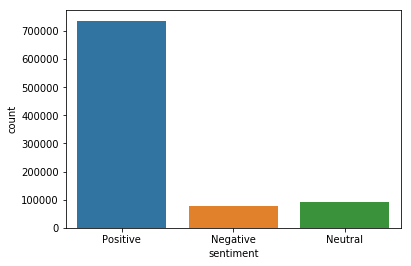

In [29]:
# reviews_proportion=reviews_sentiment['sentiment'].value_counts()/len(reviews_sentiment)
# reviews_proportion.columns=["Sentiment_rev", "Proportion"]
# reviews_proportion.columns
# sns.countplot(hue='Sentiment_rev',y='Proportion', data=reviews_proportion)
sns.countplot(x='sentiment',data=reviews_sentiment)

##### Plot of sentiment vs sector. It is seen that the retail industry has the highest reviews.

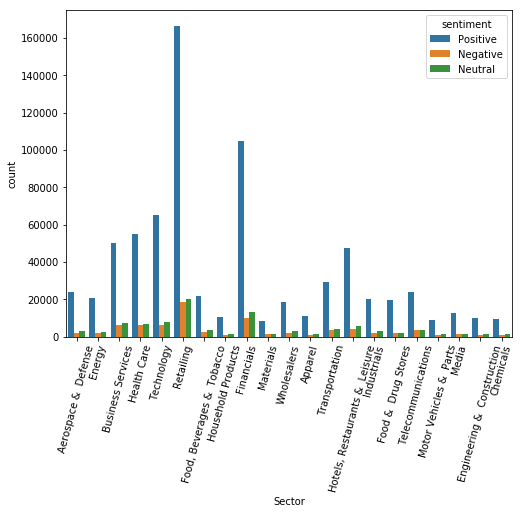

In [30]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
sns.countplot(x='Sector',hue='sentiment',data=reviews_sentiment)

In [31]:
filter_df=reviews_sentiment[(reviews_sentiment.employee_type =='Former') | (reviews_sentiment.employee_type =='Current')]

##### Plotting the sector and year in columns to see the distribution of sentiment 

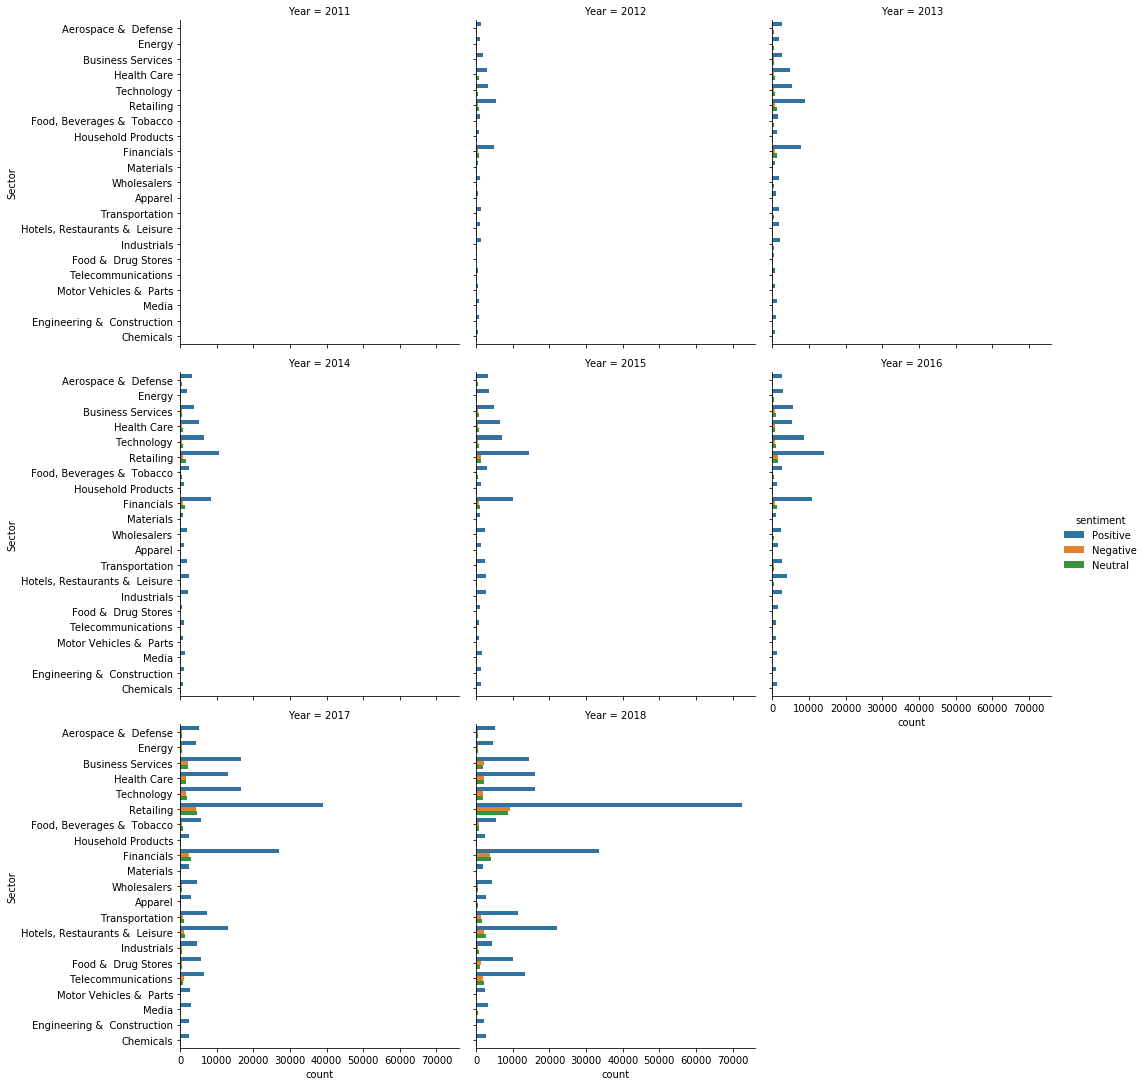

In [32]:
sns.catplot(y="Sector", hue="sentiment", col="Year",col_wrap=3,data=filter_df, kind="count")

##### using catplot analyzing the correlation between the user rating and the sentiment.

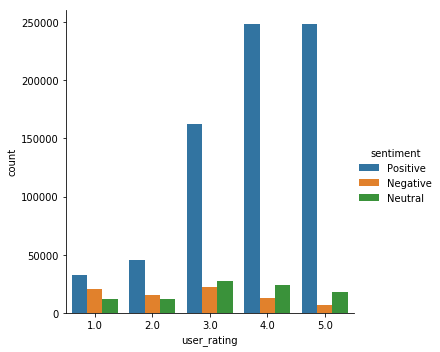

In [33]:
sns.catplot(x='user_rating',hue='sentiment',data=reviews_sentiment,kind='count')

##### Using the rating data set to the rating trend amongst companies

In [35]:
rating=pd.read_csv("C:/Users/monic/Google Drive/Fall-18/660/Project/ratings.csv")

In [36]:
rating.head(5)

,company,Industry,reviews,compensation_rating,culture_rating,globalreview_count,jobsecurity_rating,mgmt_rating,overall,worklife_rating
0,Walmart,Retailing,134651,NaN,NaN,NaN,NaN,NaN,3.6,NaN
1,Exxon Mobil,Energy,1732,3.6,3.7,"Based on 2,168 reviews",3.4,3.6,4.0,3.8
2,Berkshire Hathaway,Financials,103,3.8,4.0,Based on 106 reviews,3.6,3.9,4.1,4.0
3,Apple,Technology,5143,4.1,4.1,"Based on 6,245 reviews",3.7,3.7,4.2,3.8
4,UnitedHealth Group,Health Care,11699,3.5,3.4,"Based on 12,869 reviews",3.2,3.2,3.6,3.5


In [37]:
rating.isnull().sum(axis = 0)

company                 0
Industry                0
reviews                 0
compensation_rating    49
culture_rating         49
globalreview_count     57
jobsecurity_rating     49
mgmt_rating            49
overall                 8
worklife_rating        49
dtype: int64

In [38]:
###removing the missing values from global review column. We have not removed 
##the missing record as we will lose other column information.
rating['globalreview_count'] = rating['globalreview_count'].fillna("No reviews 0")

In [39]:
##splitting the rating column to extract the numerical count of ratings
rating.globalreview_count=rating['globalreview_count'].\
                              apply(lambda x: [int(x.replace(",","")) for x in x.split() if (x.isalpha()==False)][0])

In [40]:
rating.head(5)

,company,Industry,reviews,compensation_rating,culture_rating,globalreview_count,jobsecurity_rating,mgmt_rating,overall,worklife_rating
0,Walmart,Retailing,134651,NaN,NaN,0,NaN,NaN,3.6,NaN
1,Exxon Mobil,Energy,1732,3.6,3.7,2168,3.4,3.6,4.0,3.8
2,Berkshire Hathaway,Financials,103,3.8,4.0,106,3.6,3.9,4.1,4.0
3,Apple,Technology,5143,4.1,4.1,6245,3.7,3.7,4.2,3.8
4,UnitedHealth Group,Health Care,11699,3.5,3.4,12869,3.2,3.2,3.6,3.5


In [41]:
rating_df=rating.select_dtypes(include=['float64'])
rating_df.columns

Index(['compensation_rating', 'culture_rating', 'jobsecurity_rating',
       'mgmt_rating', 'overall', 'worklife_rating'],
      dtype='object')

##### Distribution of cultural, compensation, Job security, Management, overall and worklife balance

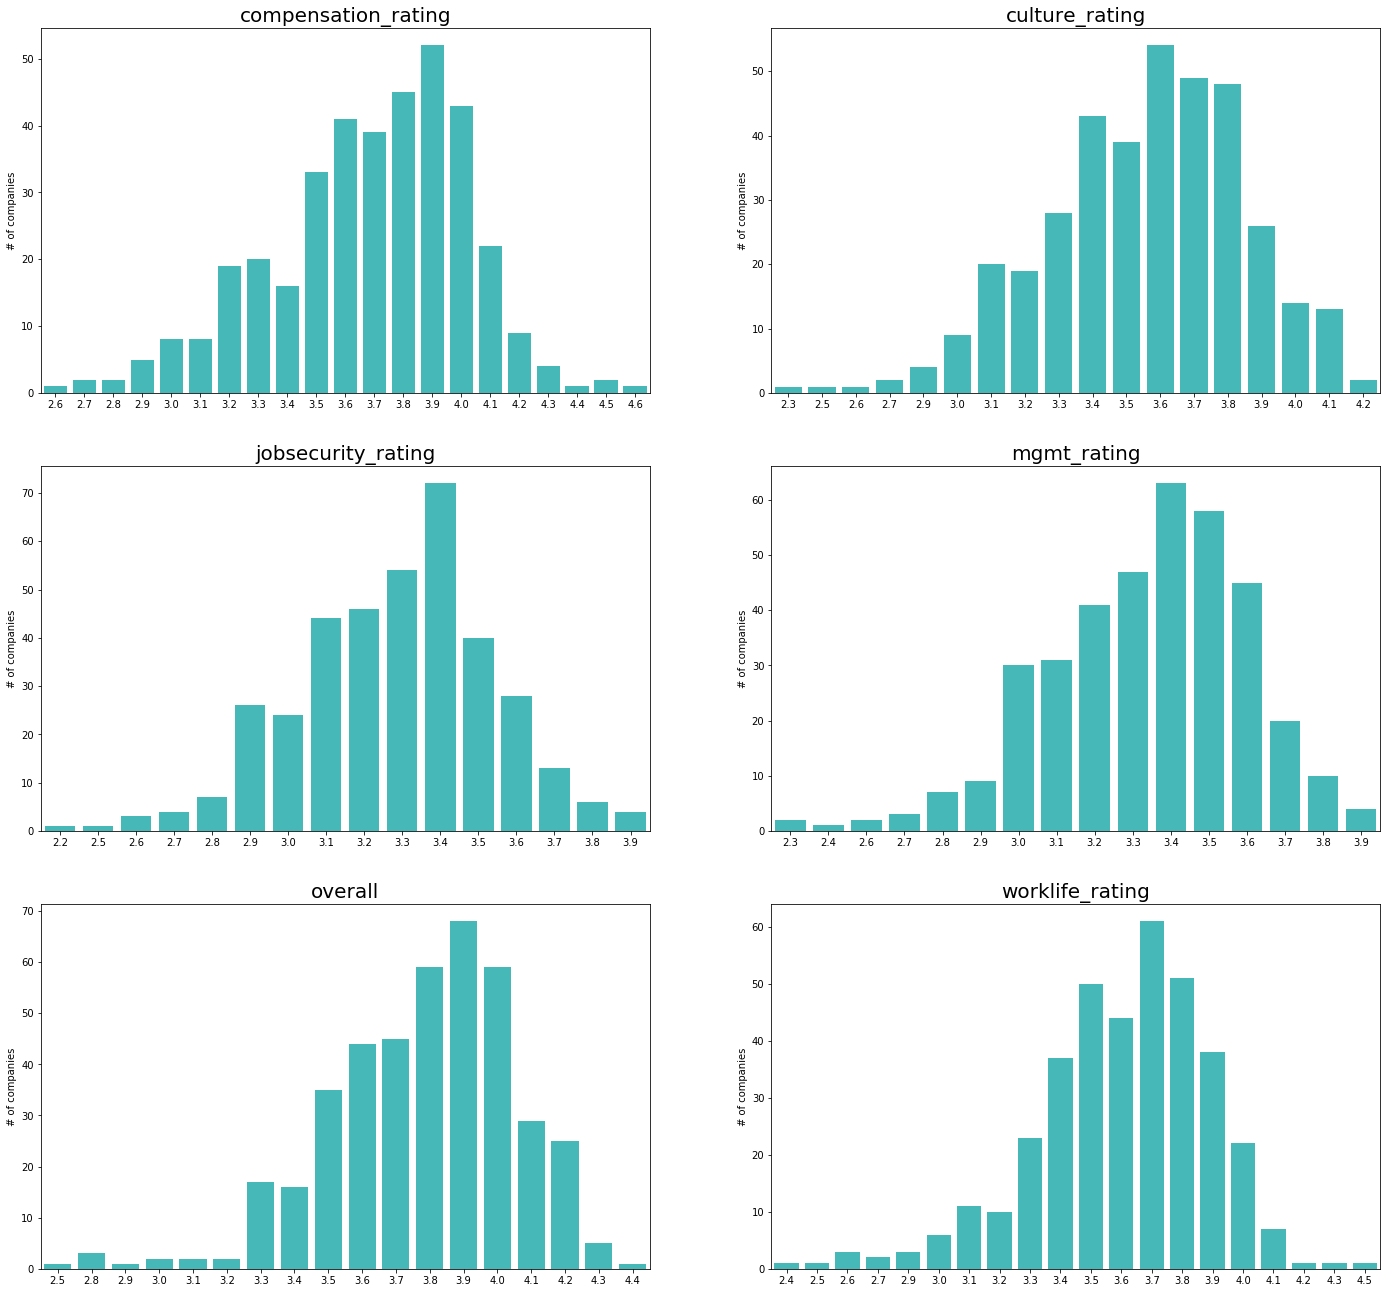

In [42]:
columns = rating_df.iloc[:,0:6].columns

grid = gridspec.GridSpec(24, 2)
plt.figure(figsize=(24,24*8))


for n, col in enumerate(rating_df[columns]):
    ax = plt.subplot(grid[n])
    ax= sns.countplot(rating_df[col],alpha=0.8,color='c')
    ax.set_ylabel('# of companies',)
    ax.set_title(str(col), fontsize = 20)
    plt.xlabel('', fontsize=12)
plt.show()

##### showing the correlation between the different type of ratings using heat map

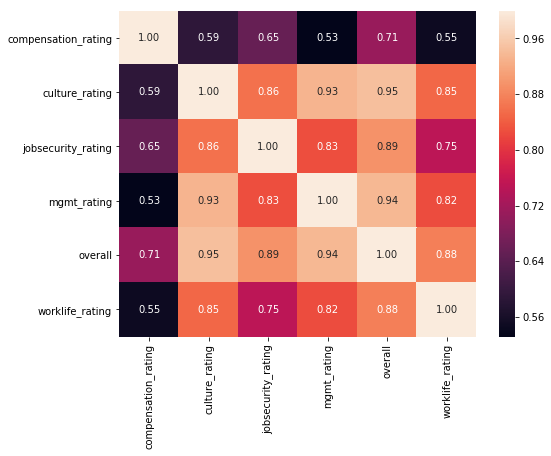

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(rating_df.corr(),annot=True, fmt=".2f")


##### plot between Industry and global reviews

[Text(0,0.5,'% global_reviews')]

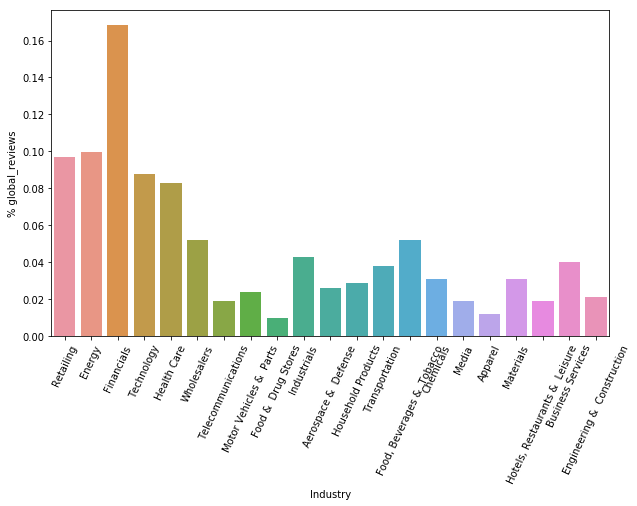

In [44]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=65)
#result = rating.groupby(["Industry"])['globalreview_count'].apply(lambda x: len(x) / len(rating)).reset_index().sort_values('Speed')
ax=sns.barplot(x='Industry',y='globalreview_count',data=rating,estimator=lambda x: len(x) / len(rating))
ax.set(ylabel="% global_reviews")

In [2]:
data=pd.read_csv("C:/Users/monic/Downloads/bia678.csv")

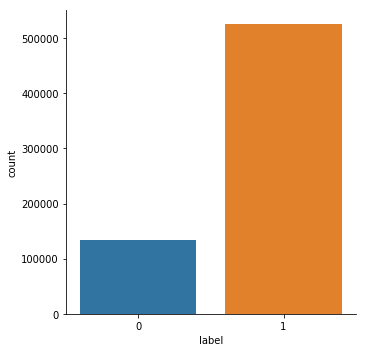

In [6]:
sns.catplot(x='label',data=data,kind='count')